в TensoFrlow есть вычислительный граф, в который мы можем записывать определенные данные и добавлять операторы. Вычисляя наш граф, вычисляя определенный оператор, мы получаем результат. 


TensoFrlow позволяет вам описать вычислительный граф или Computational Graph, в который вы можете добавить данные и добавить какие-то операторы. Эти операторы могут передавать данные друг-другу. Операторы могут зависеть друг от друга. Таким образом, вы строите вычислительный граф, который приходит к определенному результату. Чтобы запустить этот граф вам нужно создать сессию и запустить граф в рамках сессии. Таким образом, вы можете обучать вашу модель. 

In [13]:
import tensorflow as tf

In [14]:
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x

In [15]:
hello = tf.constant('Hello world!')

In [16]:
sess = tf.compat.v1.Session()
print(sess.run(hello))

b'Hello world!'


In [17]:
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
# Build a graph.
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b

# Launch the graph in a session.
sess = tf.compat.v1.Session()

# Evaluate the tensor `c`.
print(sess.run(c)) # prints 30.0


30.0


Произведем вычислительные операции с графом.

In [18]:
a = tf.constant(2.0)
b = tf.constant(3.0)
c = tf.constant([1, 2, 3, 4])
d = tf.constant([2, 3, 4, 5])

with tf.compat.v1.Session() as sess:
    print('a = {}, b = {}, c = {}, d = {}\n'.format(
        sess.run(a), sess.run(b), sess.run(c), sess.run(d)))
    
    print('a + b = {}\n'
         'a * b = {}'.format(sess.run(a + b), sess.run(a * b)))
    print('c + d = {}\n'
         'c * d = {}'.format(sess.run(c + d), sess.run(c * d)))
    

a = 2.0, b = 3.0, c = [1 2 3 4], d = [2 3 4 5]

a + b = 5.0
a * b = 6.0
c + d = [3 5 7 9]
c * d = [ 2  6 12 20]


placeholder говорит о том, что нужно добавить в вычислительный граф определенный объект, который потом получит свое значение в момент выполнения нашего графа

In [20]:
a = tf.compat.v1.placeholder(tf.int16)
b = tf.compat.v1.placeholder(tf.int16)

In [21]:
add = tf.add(a, b)
mul = tf.multiply(a, b)

в рамках нашей сессии мы можем вычислять операции с помощью определенных функций, отдельных операторов

In [24]:
with tf.compat.v1.Session() as sess:
    # сюда записывается инфа о сессии в вычисл графе
    writer = tf.compat.v1.summary.FileWriter('logs', sess.graph)
    # запустив команду в консоли, увидим как выглядит вычисл граф
    # > tensorboard --logdir logs/
    
    print('a + b = {}'.format(sess.run(add, feed_dict = {a: 3, b: 1})))
    print('a * b = {}'.format(sess.run(mul, feed_dict = {a: 7, b: 8})))

a + b = 4
a * b = 56


In [26]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

создадим задачу регрессии

с помощью функции make_regression, которая создает какой-то набор данных, который можно использовать для того, чтобы обучать нейронную сеть, обучать линейную регрессию, конечно же. 

In [34]:
from sklearn.datasets import make_regression

n_samples = 42

x_train, y_train = make_regression(
    n_samples = n_samples, n_features=1,
    noise=15, random_state=7
)

In [35]:
# нормализуем, чтобы обучать нашу модель
x_train = (x_train - x_train.mean()) / x_train.std()
y_train = (y_train - y_train.mean()) / y_train.std()

In [36]:
x_train[:5]

array([[ 0.03264883],
       [ 2.00453732],
       [-0.09529635],
       [-0.29220736],
       [ 0.19354651]])

Получились числа с определенным шумом, которые позволят нам провести определенную прямую в этих точках

In [37]:
X = tf.compat.v1.placeholder('float')
Y = tf.compat.v1.placeholder('float')

W = tf.compat.v1.Variable(np.random.rand(), name = 'weight')
b = tf.compat.v1.Variable(np.random.rand(), name = 'bias')

здесь мы получаем какую-то вершину в графе (node), которая соответствует получению предсказаний
эта вершина взаимодействует с предыдущими операциями

In [38]:
prediction = tf.add(tf.multiply(X, W), b)

learning_rate отвечает за то, как наша модель изменяет веса.

learning_rate часто константа, есть определенные методы оптимизации, которые изменяют автоматически внутри себя learning_rate. Мы сделаем его placeholder-ом, чтобы мы могли передавать разные значения learning_rate. И, например, уменьшать его по мере обучения, часто это бывает полезным. 

Также мы определим функцию потерь с помощью стандартных операций TensorFlow. Здесь мы будем просто минимизировать квадратичную функцию ошибки. мы вычитаем предсказанное значение из нашего графа со значением корректных лейблов. И возводим в квадрат разницу. И говорим, что мы хотим уменьшать сумму квадратов этой разности. И нормируем мы на количество samples в нашей выборке.

Обучаем с помощью градиентного спуска с определенным learning_rate и минимизируя функцию потерь

In [40]:
learning_rate = tf.compat.v1.placeholder(tf.float32, shape = [])

cost = tf.reduce_sum(tf.pow(prediction - Y, 2)) / n_samples #loss func

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Инициализируем глобальные переменные, чтобы переменные variable приняли параметры, которые мы им указали.

In [41]:
init = tf.compat.v1.global_variables_initializer()

- У нас есть сессия и есть наш вычислительный граф. 

- Чтобы нам обучить нашу модель, мы запускаем наш оптимизационный алгоритм на функции потерь. 

- Функция потерь определена так, что минимизирует нашу квадратичную ошибку предсказания.

- Предсказание, в свою очередь, строится на основе линейной модели


по мере наших эпох получать числа и обучать линейную регрессию. Чтобы ее обучить, нам нужно запустить сессию с оптимизатором, который будет оптимизировать заданную функцию потерь с заданным learning_rate. И будем передавать ему наши данные, на которых он будет обучаться. Здесь он будет обучаться на x и y batch с определенным learning_rate. И каждую сотую эпоху мы будем выводить отладочную информацию, для того чтобы понять, как хорошо наша модель обучается. 

In [42]:
epochs = 1000
#получаем верх нашей сессии
sess = tf.compat.v1.Session()
#инициализируем переменные
sess.run(init)

lr = 0.1
for epoch in range(epochs):
    for (x_batch, y_batch) in zip(x_train, y_train):
        sess.run(optimizer, feed_dict = {X: x_batch, Y: y_batch, learning_rate: lr})
        
    if epoch % 100 == 0:
        lr /= 2
        c = sess.run(cost, feed_dict = {X: x_train, Y: y_train})
        print('Epoch #{}: cost = {}'.format(epoch, c))

Epoch #0: cost = 81.21943664550781
Epoch #100: cost = 67.6355972290039
Epoch #200: cost = 67.46206665039062
Epoch #300: cost = 67.3815689086914
Epoch #400: cost = 67.34587097167969
Epoch #500: cost = 67.32942962646484
Epoch #600: cost = 67.32154083251953
Epoch #700: cost = 67.31765747070312
Epoch #800: cost = 67.3145523071289
Epoch #900: cost = 67.31415557861328


Модель обучилась, посмотрим, как хорошо она описала наши данные

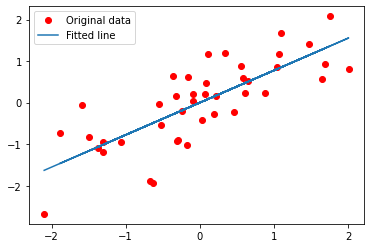

In [43]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label = 'Fitted line')
plt.legend()
plt.show()

In [44]:
sess.close()